# Digit Recognition

In this project, I will work with the MNIST dataset which includes a large number of images with each image representing a digit from `0` to `9`. The aim of this project is to train a model on the data and correctly classify the images. As an extension, I will work with `GridSearchCV` to tune parameters and extract the best parameters for the model.

## Import libraries and dataset

I import `numpy`, and `pandas` to work with data. Next, I use `matplotlib` to read images and draw visualizations. Finally, I use `sklearn` to import necessary subpackges to get the model to train on the data.

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import rainbow
%matplotlib inline

from sklearn.datasets import fetch_openml
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Import dataset from sklearn's `fetch_openml` method

In [5]:
train_data = pd.read_csv('data/mnist_train.csv')
test_data = pd.read_csv('data/mnist_test.csv')

In [6]:
print("Training data:")
print("Shape: {}".format(train_data.shape))
print("Total images: {}".format(train_data.shape[0]))

print("Testing data:")
print("Shape: {}".format(test_data.shape))
print("Total images: {}".format(test_data.shape[0]))

Training data:
Shape: (60000, 785)
Total images: 60000
Testing data:
Shape: (10000, 785)
Total images: 10000


There are **60,000 training images** and **10,000 testing images**. The dataset includes the class inside the column name `label`. I'll now separate the features and labels for both training and testing data.

In [19]:
train_y = train_data['label']
train_X = train_data.drop(columns = ['label'])

test_y = test_data['label']
test_X = test_data.drop(columns = ['label'])

## Exploring data

Here, I'll keep the testing dataset aside and work with the training data only. I'll now use test data only during final model evaluation.

### Analysing class distribution

First, I count the labels in the training set and check if the classes include comparatively equal count of images.

Text(0.5, 1.0, 'Count of images for each digit (0 - 9)')

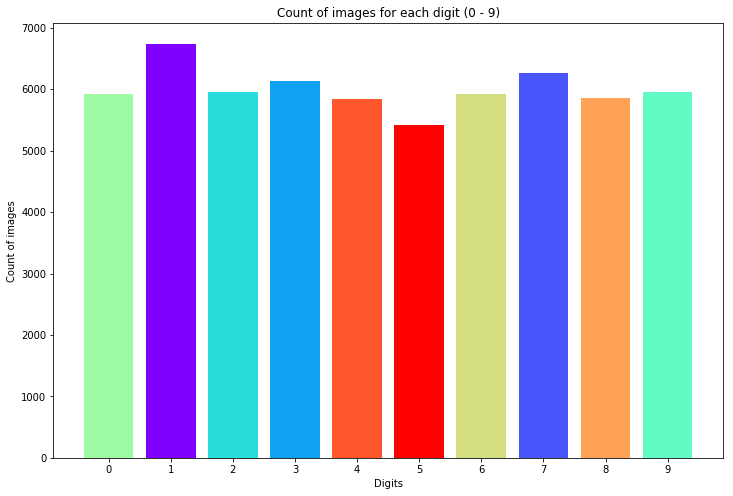

In [35]:
train_labels = train_y.value_counts()
plt.figure(figsize = (12, 8))
cmap = rainbow(np.linspace(0, 1, train_labels.shape[0]))
plt.bar(train_labels.index.values, train_labels, color = cmap)
plt.xticks(train_labels.index.values)
plt.xlabel('Digits')
plt.ylabel('Count of images')
plt.title('Count of images for each digit (0 - 9)')

While there is some variation across count of images for each class, the variation can be ignored and we can proceed to analyse the data further as it won;t hugely impact the training of the model.

### Viewing the training data images

I'll now randomly select 10 images from the training data and view them.

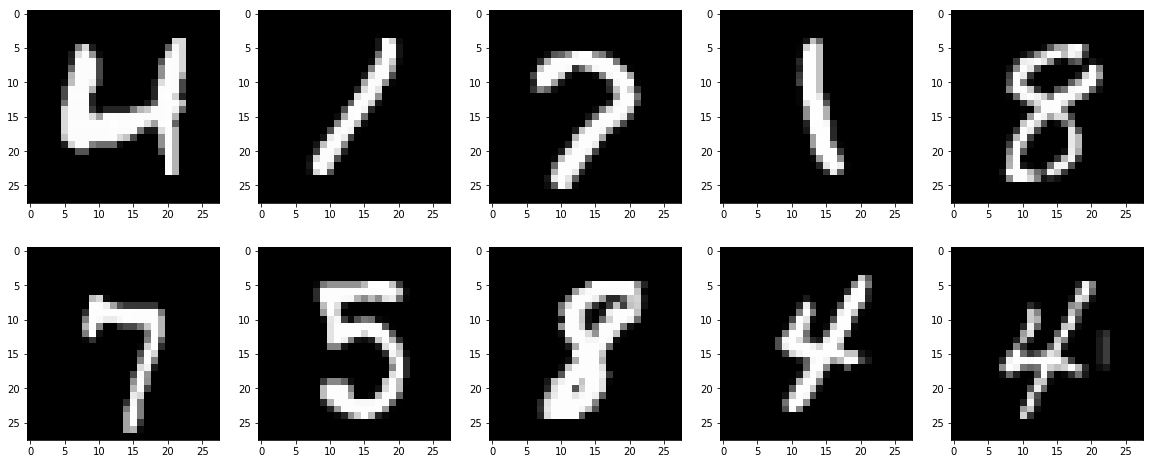

In [54]:
np.random.seed(0)
plt.figure(figsize = (20, 8))
for i in range(10):
    index = np.random.randint(train_X.shape[0])
    image_matrix = train_X.iloc[index].values.reshape(28, 28)
    plt.subplot(2, 5, i+1)
    plt.imshow(image_matrix, cmap=plt.cm.gray)

While it's easy to recognize the digit represented by each image, one must note that not each digit's image matches the other. The three images of `4` is different from one another in the form of style as well as thickness. This would make learning for the machine learning challenging. Let's see how Random Forest performs on the dataset.

## Applying Machine Learning

After analysing the data, I'll now apply **Random Forest Classifier** using the default parameter values.

In [55]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(train_X, train_y)

/Users/k.bhanot/Personal/Important Work/Machine Learning/Digit-Recognition-with-Parameter-Tuning/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Classifying and analysing

Now, I'll use the trained model to classify the testing images and analyse the results. First, I'll use the `predict` method to predict the results on the test data.

In [57]:
pred_y = random_forest_classifier.predict(test_X)

### Metrics

I'll use **accuracy_score** and **confusion_matrix** to analyse the classification done by the model.

In [58]:
print("Accuracy: {}%".format(accuracy_score(test_y, pred_y)*100))
print("Confusion Matrix:")
print("{}".format(confusion_matrix(test_y, pred_y)))

Accuracy: 94.42%
Confusion Matrix:
[[ 966    0    5    0    2    1    1    2    3    0]
 [   0 1118    3    3    1    2    3    0    5    0]
 [   8    4  977    9    5    1    4   14   10    0]
 [   4    0   25  940    0   21    0    7   10    3]
 [   3    2    3    2  931    0    9    3    7   22]
 [   5    3    6   26    1  830    6    3    8    4]
 [  11    3    3    2    6    8  918    0    7    0]
 [   3    4   29    4    7    1    0  964    2   14]
 [   9    0   11   23   16   14    9    6  874   12]
 [   8    7    7   13   27    7    0    6   10  924]]


### Analysing

Taking a look at the metrics, the model has very well performed on the test data and has acheived an **accuracy of 94.42%**. The confusion matrix also displays the same trend where majority classes are correctly identified as can be seen with the values across the diagonal.

Let's also take a look at 10 examples from the test data and see how correctly our model predicts.

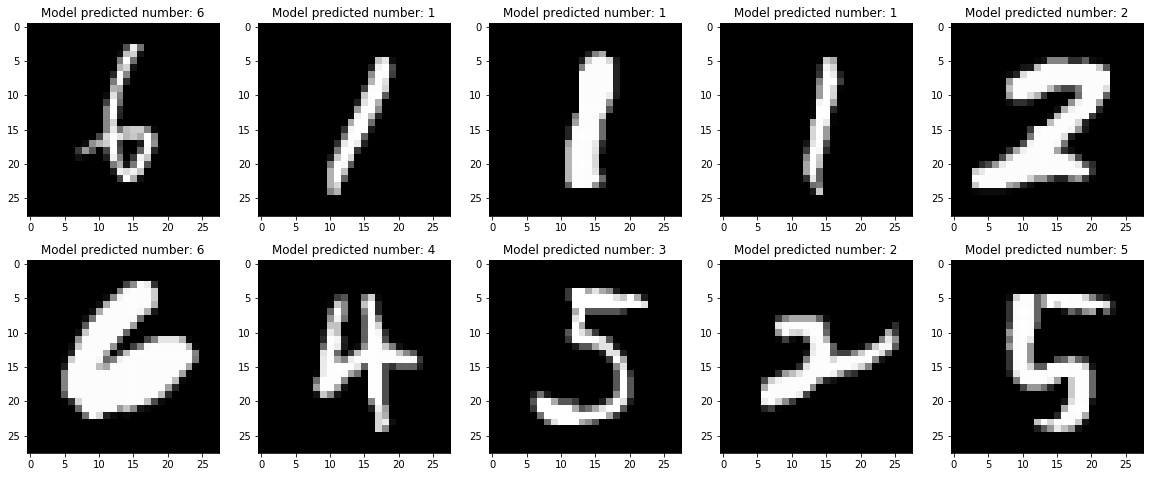

In [68]:
np.random.seed(0)
plt.figure(figsize = (20, 8))
for i in range(10):
    index = np.random.randint(test_X.shape[0])
    image_matrix = test_X.iloc[index].values.reshape(28, 28)
    plt.subplot(2, 5, i+1)
    plt.imshow(image_matrix, cmap=plt.cm.gray)
    plt.title("Model predicted number: {}".format(random_forest_classifier
                                                  .predict(test_X.iloc[index].values.reshape(1, -1))[0]))

It's amazing how the model is even able to predict the 9th image as `2` which is very difficult to predict even for a human. However, it incorrectly predicts the 8th image as `3` while it clearly is `5`.